# Principal Component Analysis & Clustering

## PCA

In [1]:
import pandas as pd
import dataframe_image as dfi
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# https://www.kaggle.com/datasets/saurabh00007/iriscsv
filename = 'Iris.csv'
df = pd.read_csv(filename, index_col=0)
cols_x = list(df.columns[0:4])
col_y = df.columns[4]

# model pipeline for PCA
pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('PCA', PCA()),
])
features = df[cols_x]
pipe.fit(features)

# PCA scores
scores = pipe.transform(features)
df_pca = pd.DataFrame(
    scores,
    columns=["PC{}".format(x + 1) for x in range(scores.shape[1])],
    index=df.index
)
cols_pc = list(df_pca.columns)
df_pca.insert(0, col_y, df[col_y].copy())
dfi.export(df_pca.head(), 'table_031_iris_PCA.png')
df_pca.head()

/usr/bin/google-chrome


,Species,PC1,PC2,PC3,PC4
Id,,,,,
1,Iris-setosa,-2.264542,0.505704,-0.121943,-0.023073
2,Iris-setosa,-2.086426,-0.655405,-0.227251,-0.103208
3,Iris-setosa,-2.367950,-0.318477,0.051480,-0.027825
4,Iris-setosa,-2.304197,-0.575368,0.098860,0.066311
5,Iris-setosa,-2.388777,0.674767,0.021428,0.037397


# K-Means

In [2]:
from sklearn.cluster import KMeans

X = df_pca[cols_pc]
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X)
#kmeans = KMeans(random_state=0, n_init="auto").fit(X)
df_pca['K-Means'] = kmeans.labels_
df_pca.head()

,Species,PC1,PC2,PC3,PC4,K-Means
Id,,,,,,
1,Iris-setosa,-2.264542,0.505704,-0.121943,-0.023073,0
2,Iris-setosa,-2.086426,-0.655405,-0.227251,-0.103208,0
3,Iris-setosa,-2.367950,-0.318477,0.051480,-0.027825,0
4,Iris-setosa,-2.304197,-0.575368,0.098860,0.066311,0
5,Iris-setosa,-2.388777,0.674767,0.021428,0.037397,0


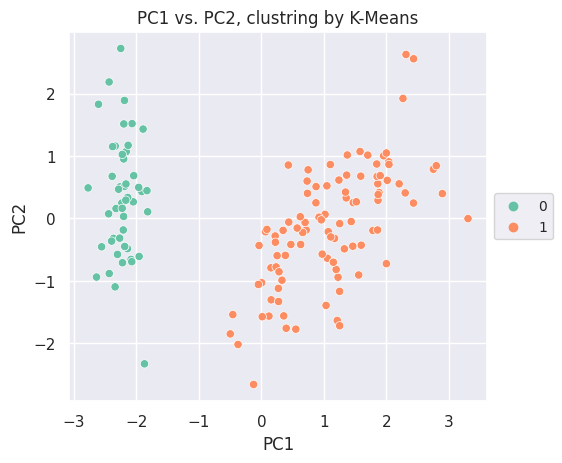

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.size'] = 14
sns.set()

fig, ax = plt.subplots()
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='K-Means', palette='Set2', ax=ax)
ax.set_aspect('equal')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)
ax.set_title('PC1 vs. PC2, clustring by K-Means')

plt.savefig('iris_051_PCA_Clustering_KMeans.png')
plt.show()

# Agglomerative Clustering

In [4]:
from sklearn.cluster import AgglomerativeClustering

aggloclust = AgglomerativeClustering(n_clusters=2).fit(X)
aggloclust.labels_
df_pca['Agglomerative'] = aggloclust.labels_
df_pca.head()

,Species,PC1,PC2,PC3,PC4,K-Means,Agglomerative
Id,,,,,,,
1,Iris-setosa,-2.264542,0.505704,-0.121943,-0.023073,0,1
2,Iris-setosa,-2.086426,-0.655405,-0.227251,-0.103208,0,1
3,Iris-setosa,-2.367950,-0.318477,0.051480,-0.027825,0,1
4,Iris-setosa,-2.304197,-0.575368,0.098860,0.066311,0,1
5,Iris-setosa,-2.388777,0.674767,0.021428,0.037397,0,1


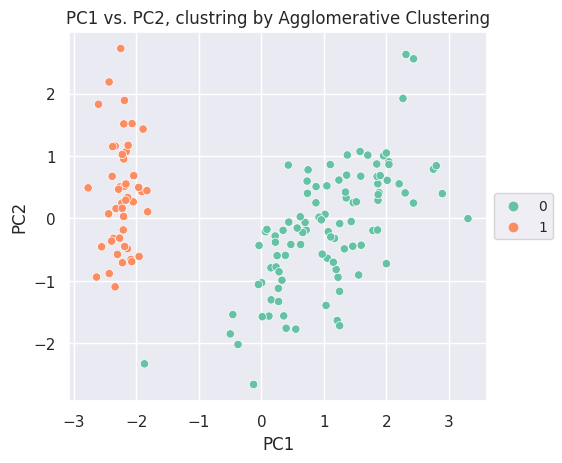

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.size'] = 14
sns.set()

fig, ax = plt.subplots()
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Agglomerative', palette='Set2', ax=ax)
ax.set_aspect('equal')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)
ax.set_title('PC1 vs. PC2, clustring by Agglomerative Clustering')

plt.savefig('iris_052_PCA_Clustering_Agglomerative.png')
plt.show()